In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [5]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h2>19. 03. 2025.</h2>

In [6]:
cube_wfa = fits.open("loc_dyn_32_32_16_series_tumag_l2_wfa.fits")[0].data

In [7]:
np.shape(cube_wfa)

(31, 768, 768)

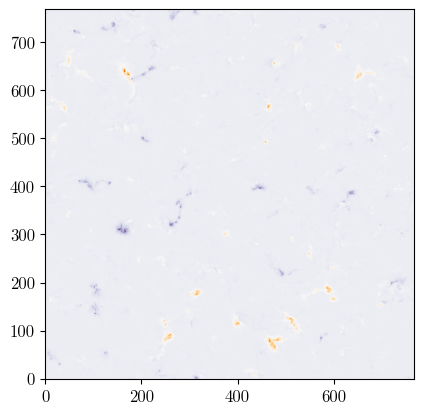

In [8]:
plt.imshow(cube_wfa[0,:,:], origin = "lower", cmap = "PuOr")

In [9]:
Bz_tm3 = fits.open("Bz_0_001.fits")[0].data
Bz_tm3 = Bz_tm3[::3, ::2, ::2]

In [10]:
Bz_tm4 = fits.open("Bz_0_0001.fits")[0].data
Bz_tm4 = Bz_tm4[::3, ::2, ::2]

In [11]:
Bz_tm4 = Bz_tm4.transpose(0, 2, 1)
Bz_tm3 = Bz_tm3.transpose(0, 2, 1)

In [12]:
Bz_tm1 = fits.open("Bz_0_100.fits")[0].data
Bz_tm1 = Bz_tm1[::3, ::2, ::2]
Bz_tm2 = fits.open("Bz_0_010.fits")[0].data
Bz_tm2 = Bz_tm2[::3, ::2, ::2]

In [13]:
Bz_tm1 = Bz_tm1.transpose(0, 2, 1)
Bz_tm2 = Bz_tm2.transpose(0, 2, 1)

In [14]:
R_m3_base = pearsonr(Bz_tm3[0].flatten(), cube_wfa[0].flatten())
print(R_m3_base)
R_m4_base = pearsonr(Bz_tm4[0].flatten(), cube_wfa[0].flatten())
print(R_m4_base)

PearsonRResult(statistic=0.9141980441243527, pvalue=0.0)
PearsonRResult(statistic=0.8003005764408206, pvalue=0.0)


In [15]:
Rm3 = pearsonr(np.mean(Bz_tm3, axis = 0), np.mean(cube_wfa, axis = 0))
print(Rm3, end='\n')

PearsonRResult(statistic=array([ 0.65464899,  0.62885058,  0.59313292,  0.57090352,  0.58725058,
        0.6241533 ,  0.65763808,  0.69068801,  0.7096204 ,  0.72965207,
        0.73319349,  0.72405619,  0.72609226,  0.7448429 ,  0.76793523,
        0.77811577,  0.78404777,  0.78577541,  0.78972985,  0.7863688 ,
        0.76557834,  0.71961663,  0.65655053,  0.64337623,  0.65617131,
        0.6405257 ,  0.62160066,  0.57706205,  0.52206406,  0.49583817,
        0.47934472,  0.48590434,  0.47681557,  0.46820106,  0.44349119,
        0.43705091,  0.45748442,  0.48126967,  0.50914284,  0.54566383,
        0.58332257,  0.59729558,  0.61826168,  0.64250362,  0.67074743,
        0.70530615,  0.72385417,  0.73874204,  0.75041359,  0.74552506,
        0.72323837,  0.70431234,  0.68389459,  0.66355244,  0.64522487,
        0.61404022,  0.56425197,  0.54463851,  0.52923   ,  0.50753626,
        0.50218925,  0.50487789,  0.51915273,  0.53700644,  0.53015443,
        0.514819  ,  0.49760301,  0.491

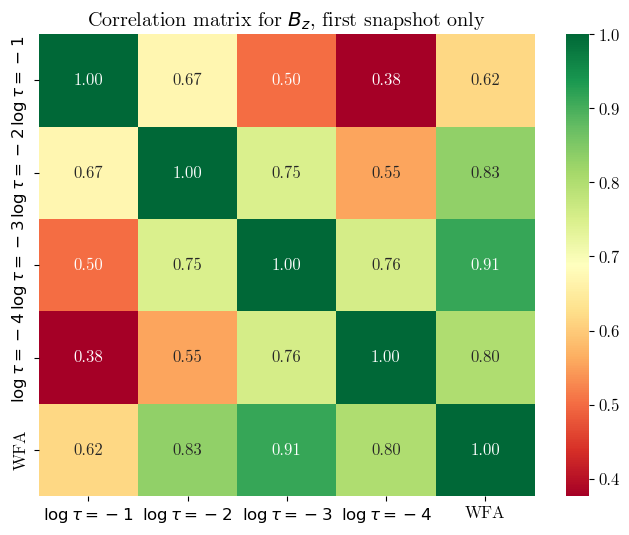

In [16]:
correlation_matrix = np.corrcoef([Bz_tm1[0,:,:].ravel(), Bz_tm2[0,:,:].ravel(),
                     Bz_tm3[0,:,:].ravel(), Bz_tm4[0,:,:].ravel(), 
                     cube_wfa[0,:,:].ravel()]) 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'WFA'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'WFA'])
plt.title('Correlation matrix for $B_z$, first snapshot only')
plt.savefig("WFA_vs_simBz.png", dpi = 70)
plt.show()

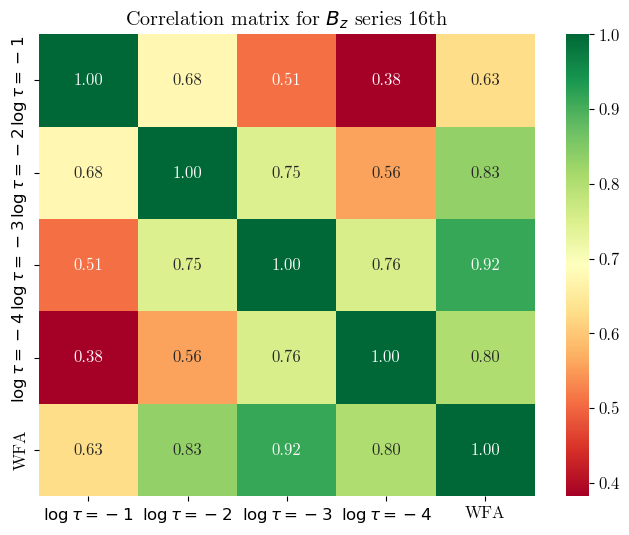

In [17]:
correlation_matrix = np.corrcoef([Bz_tm1[15,:,:].ravel(), Bz_tm2[15,:,:].ravel(),
                     Bz_tm3[15,:,:].ravel(), Bz_tm4[15,:,:].ravel(), 
                     cube_wfa[15,:,:].ravel()]) 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn',
            xticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'WFA'],
            yticklabels=['$\log\\tau = -1$', '$\log\\tau = -2$', '$\log\\tau = -3$', '$\log\\tau = -4$', 'WFA'])
plt.title('Correlation matrix for $B_z$ series 16th')
plt.savefig("allWFA_vs_simBz.png", dpi = 70)
plt.show()

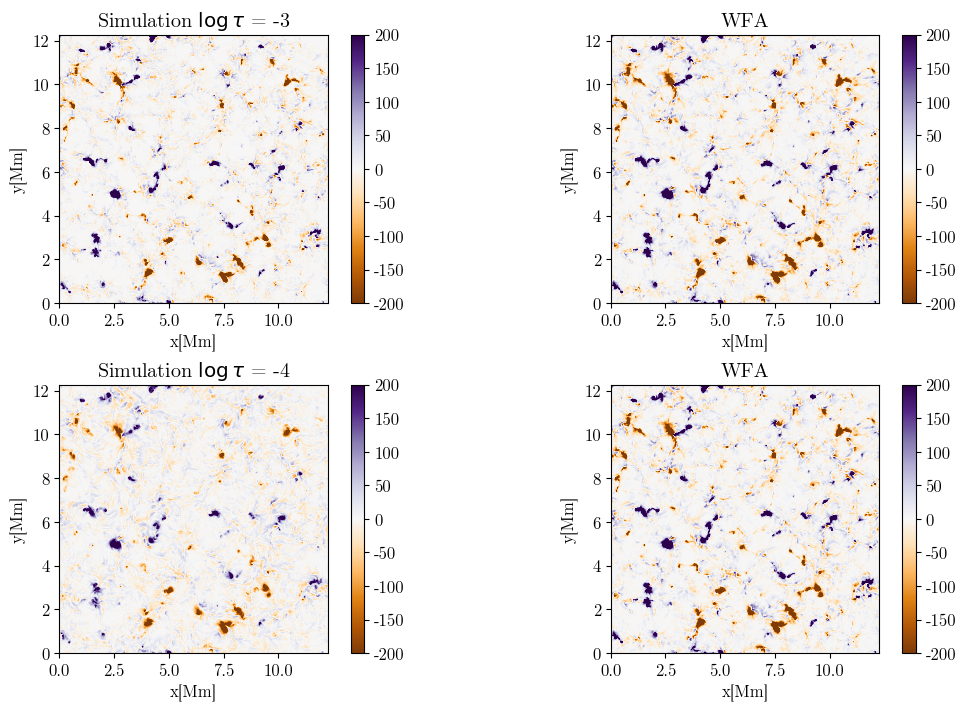

In [18]:
plt.figure(constrained_layout=True, figsize = (11,7))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.set_title("Simulation $\log\\tau$ = -3")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Bz_tm3[0, :, :], origin='lower', cmap = "PuOr", extent = (0, 12.268, 0, 12.268), vmin = -200, vmax = 200)
plt.colorbar(im1)


ax3 = plt.subplot2grid((2,2), (0,1))
ax3.set_title("WFA")
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
im3 = ax3.imshow(cube_wfa[0, :, :], origin='lower', cmap = "PuOr", extent = (0, 12.268, 0, 12.268), vmin = -200, vmax = 200)
plt.colorbar(im3)


ax4 = plt.subplot2grid((2,2), (1,0))
ax4.set_title("Simulation $\log\\tau$ = -4")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Bz_tm4[0, :, :], origin='lower', cmap = "PuOr", extent = (0, 12.268, 0, 12.268), vmin = -200, vmax = 200)
plt.colorbar(im4)


ax6 = plt.subplot2grid((2,2), (1,1))
ax6.set_title("WFA")
ax6.set_xlabel("x[Mm]")
ax6.set_ylabel("y[Mm]")
im6 = ax6.imshow(cube_wfa[0, :, :], origin='lower', cmap = "PuOr", extent = (0, 12.268, 0, 12.268), vmin = -200, vmax = 200)
plt.colorbar(im6)


#fig.tight_layout()
plt.savefig("Wfa_Bz.png", dpi = 70)